# 2.Clasification

Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
#model selection
from sklearn.model_selection import train_test_split

#classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

#Experiment with deeplearning eh multi layer JST
import tensorflow as tf
from tensorflow import keras

sns.set()
%matplotlib inline

### Import datasets

In [2]:
df = pd.read_csv('data/main_dataset_labeled_v2.csv')
y = df['best_pos']
X = df.drop(['best_pos'], axis=1)
d = joblib.load('data/label_encoder_model_v2.sav')
print(X.shape, y.shape)

(18278, 57) (18278,)


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5, 48.5, 50.5, 52.5, 54.5, 56.5]),
 <a list of 29 Text yticklabel objects>)

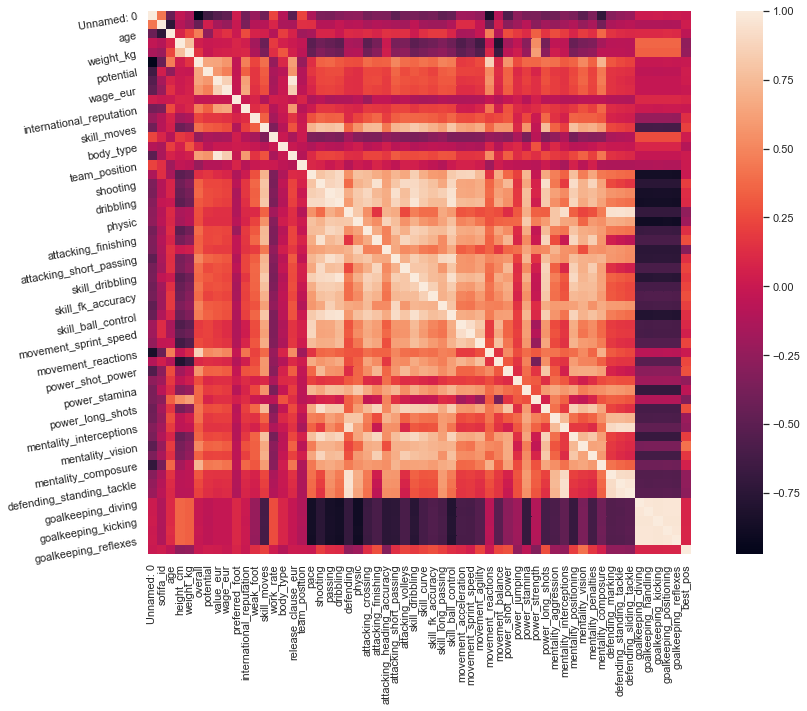

In [3]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(16, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=10)

Nice, let's build a dataframe using "i think this is important feature"

In [4]:
i_think_important = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
X = X[i_think_important]
X.head()

,pace,shooting,passing,dribbling,defending,physic
0,87.0,92.0,92.0,96.0,39.0,66.0
1,90.0,93.0,82.0,89.0,35.0,78.0
2,91.0,85.0,87.0,95.0,32.0,58.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,91.0,83.0,86.0,94.0,35.0,66.0


## Clasify

In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10101)

In [6]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
result = clf.predict(X_test)

In [8]:
classes = d['best_pos'].classes_
print(*zip(range(6),classes),sep='\n')

(0, 'Back')
(1, 'Fwd')
(2, 'Goal_Keeper')
(3, 'Mid_Centre')
(4, 'Mid_Side')


In [10]:
d['best_pos'].inverse_transform([3])

array(['Mid_Centre'], dtype=object)

In [12]:
result = pd.DataFrame(result)
result_inverse = d['best_pos'].inverse_transform(np.ravel(result))

In [13]:
clf.score(X_test,y_test)*100

80.61269146608315

In [14]:
report = classification_report(y_test, result, zero_division=True, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.to_csv('output/svm.csv')

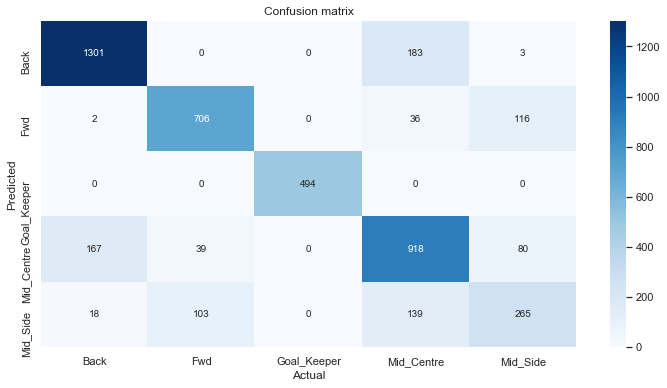

In [15]:
conf_matrix = confusion_matrix(y_test, result)
plt.figure(figsize=(12,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=classes, 
            yticklabels=classes,
            cmap="Blues",
            fmt='d')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [16]:
#save model
joblib.dump(clf,'model/svm.sav')

['model/svm.sav']